# HR Analytics Project- Understanding the Attrition in HR

In [ ]:
* Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in 
training those employees, not just this but there are training programs within the companies for 
their existing employees as well. The aim of these programs is to increase the effectiveness of
their employees. But where HR Analytics fit in this? and is it just about improving the performance
of employees?
         * HR Analytics
         * Attrition in HR
         * Attrition affecting Companies
    

In [61]:
# Packages to be imported are as follows-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Reading the data
hr_df = pd.read_csv("D:\Data Trained\WA_Fn-UseC_-HR-Employee-Attrition.csv")
# Getting the shape
hr_df.shape

(1470, 35)

In [5]:
# This will print the names of 15 samples
hr_df.sample(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1021,25,Yes,Travel_Rarely,383,Sales,9,2,Life Sciences,1,1439,...,1,80,0,6,2,3,3,2,2,2
309,31,No,Travel_Rarely,691,Research & Development,5,4,Technical Degree,1,423,...,3,80,1,6,4,3,5,2,0,3
43,27,No,Travel_Frequently,994,Sales,8,3,Life Sciences,1,56,...,4,80,0,9,0,3,9,8,1,7
849,43,Yes,Travel_Rarely,1372,Sales,9,3,Marketing,1,1188,...,2,80,0,7,2,2,4,3,1,3
440,34,Yes,Travel_Frequently,988,Human Resources,23,3,Human Resources,1,590,...,3,80,3,11,2,3,3,2,0,2
370,21,Yes,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,...,4,80,0,1,0,3,1,0,0,0
1143,45,No,Non-Travel,336,Sales,26,3,Marketing,1,1612,...,1,80,1,10,2,3,10,7,4,5
241,32,No,Non-Travel,976,Sales,26,4,Marketing,1,333,...,1,80,0,4,2,3,3,2,2,2
131,50,No,Travel_Frequently,809,Sales,12,3,Marketing,1,174,...,4,80,0,16,3,3,2,2,2,1
80,30,No,Travel_Rarely,852,Research & Development,1,1,Life Sciences,1,104,...,3,80,2,10,1,2,10,8,3,0


In [58]:
# It will give Index, Datatype and Memory information
hr_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   DailyRate                          1470 non-null   int64 
 3   DistanceFromHome                   1470 non-null   int64 
 4   Education                          1470 non-null   int64 
 5   EmployeeNumber                     1470 non-null   int64 
 6   EnvironmentSatisfaction            1470 non-null   int64 
 7   HourlyRate                         1470 non-null   int64 
 8   JobInvolvement                     1470 non-null   int64 
 9   JobLevel                           1470 non-null   int64 
 10  JobSatisfaction                    1470 non-null   int64 
 11  MonthlyIncome                      1470 non-null   int64 
 12  Monthl

In [ ]:
* Here,we dont have any missing values with 1470 complete data and 46 columns. 
  Now we do Feature Engineering on the Date Feature in pre-processing later so we
  can do to use the day and the month columns in building the machine learning model further.

In [7]:
# Getting missing values using this
hr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
* So, here all values 1470 are perfect and dont have any mising values

In [60]:
# Let see the null count for each column, but will not count
hr_df.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Fre

* Its good , there are no null values adn all are zero's

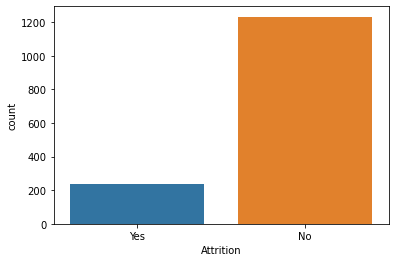

In [59]:
# Preparing a plot for Attribution
sns.countplot('Attrition', data=hr_df);

In [8]:
hr_df.isnull().any().any()

False

In [9]:
# removing EmployeeCount from numerical 
hr_df = hr_df.drop('EmployeeCount', axis=1) 
hr_df = hr_df.drop('StandardHours', axis=1)

In [10]:
categorical_cols = [feature for feature in hr_df.columns if hr_df[feature].dtype=='object']
hr_df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
527,No,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,Y,No
46,No,Non-Travel,Sales,Marketing,Male,Sales Executive,Single,Y,No
612,No,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Married,Y,Yes
1162,Yes,Travel_Rarely,Sales,Medical,Male,Sales Executive,Married,Y,No
1460,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Y,No


In [23]:
cols = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18'
 'OverTime',]


# * APPLYING VARIOUS ML MODELS ON THE DATASET *

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV,  cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
X = hr_df.drop('Attrition', axis=1)
y =hr_df['Attrition']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
cols = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [28]:
scaler = StandardScaler()
for col in cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1 ,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1 ,1))

# Doing model selection/predictions

In [ ]:

lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_test, y_train, y_test)

In [ ]:
model.sort_values('Accuracy', ascending=False)

In [44]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []  
    

In [48]:
from sklearn.model_selection import cross_val_score  

# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    # determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  

The optimal number of neighbors is  7 


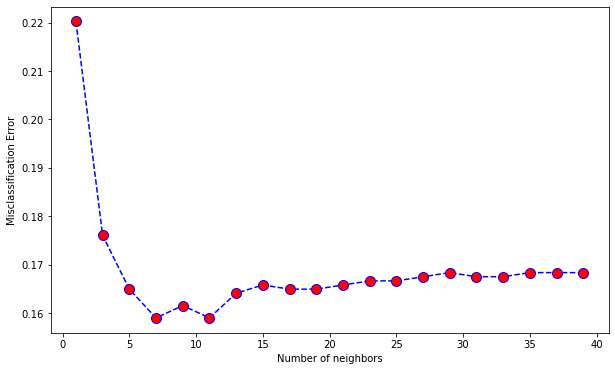

In [49]:
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()

* The graph shows a sudden decrease in the misclassification error from 0.22 to 0.18 and 
constantly goin in between 0.16 to 0.17

---------MAKING Training and Testing ANALYSIS--------
---------MAKING CONFUSION MATRIX AND CLASSIFICATION REPORT--------

In [51]:
def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      1.00      0.92       978
         Yes       0.90      0.18      0.30       198

    accuracy                           0.86      1176
   macro avg       0.88      0.59      0.61      1176
weighted avg       0.86      0.86      0.82      1176


Confusion Matrix: 
 [[974   4]
 [163  35]]

Average Accuracy: 	 0.8410
Accuracy SD: 		 0.0130
accuracy score: 0.8580

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.88      0.98      0.93       255
         Yes       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294


Confusion Matrix: 
 [[251   4]
 [ 35   4]]

accuracy score: 0.867

In [52]:
# We set our random seed to zero for reproducibility
# Random Forest parameters
seed = 0 
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [53]:
rfc = RandomForestClassifier(**rf_params) 
rfc.fit(X_train, y_train) 
print_score(rfc, X_train, y_train, X_test, y_test, train = False) 
print_score(rfc, X_train, y_train, X_test, y_test, train = True) 

Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.88      1.00      0.94       255
         Yes       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294


Confusion Matrix: 
 [[255   0]
 [ 35   4]]

accuracy score: 0.8810

-----------------------------------------------------------
Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       978
         Yes       1.00      0.14      0.24       198

    accuracy                           0.85      1176
   macro avg       0.93      0.57      0.58      1176
weighted avg       0.88      0.85      0.81      1176


Confusion Matrix: 
 [[978   0]
 [171  27]]

Average Accuracy: 	 0.8410
Accuracy SD: 		 0.0124
accuracy score: 0.85

In [54]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [55]:
gbc = GradientBoostingClassifier(**gb_params) 
gbc.fit(X_train, y_train) 
print_score(gbc, X_train, y_train, X_test, y_test, train = False) 
print_score(gbc, X_train, y_train, X_test, y_test, train = True) 

Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.90      0.96      0.93       255
         Yes       0.57      0.33      0.42        39

    accuracy                           0.88       294
   macro avg       0.73      0.65      0.68       294
weighted avg       0.86      0.88      0.86       294


Confusion Matrix: 
 [[245  10]
 [ 26  13]]

accuracy score: 0.8776

-----------------------------------------------------------
Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       978
         Yes       1.00      1.00      1.00       198

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[978   0]
 [  0 198]]

Average Accuracy: 	 0.8622
Accuracy SD: 		 0.0155
accuracy score: 1.00

In [ ]:
* Finally the Accuracy scores are changed from 0.8580 to 1.0000 , whcih is good result

Text(0, 0.5, 'Features')

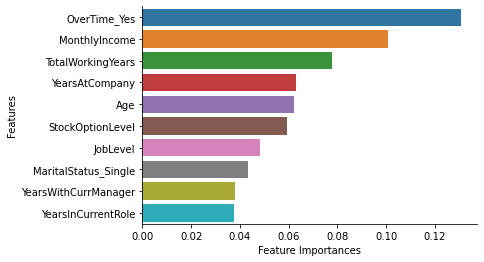

In [56]:
feature = rfc.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")

In [ ]:
ANALYSIS CONCLUSION :-
    
The reasons why  Employees leave the Organization are as follows
No Overtime:
Monthly Income:
Age: 
Knowing all these reasons why employees leave the organization, can help the organization 
take action and reduce the level of Attrition inside the organization.

I have constructed a simple pipeline design of predicting employee attrition, from some basic
EDA to feature engineering as well as implementing three learning models like K-Neighours
Classifier,RandomForest and GradientBooster Classifier.

